In [2]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [10]:
np.random.seed(20160512)

n0, mu0, variance0 = 800, [10, 11], 20 # 800개 데이터 생성
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0) # multivariate_normal(중심좌표, variances, 데이터 갯수)
df0 = DataFrame(data0, columns=['x','y'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x','y'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True) #pd.concat()
train_set = df.reindex(permutation(df.index)).reset_index(drop=True) #permutaion(array): array를 복사해서 셔플한다. np.random.shuffle([1,2,3,4,5]) ==> [3,2,4,5,1]


num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

In [24]:
train_x = train_set[['x','y']].values
train_t = train_set[['t']].values

test_x = test_set[['x','y']].values
test_t = test_set[['t']].values

In [18]:
#그래프를 준비한다. 
X = tf.placeholder(tf.float32, shape=(None,2))
Y = tf.placeholder(tf.float32, shape=(None,1))
M = tf.Variable([[0.0], [0.0]])
M0 = tf.Variable([[0.0]])
Z = tf.matmul(X,M)+M0
p = tf.sigmoid(Z)

In [21]:
#오차함수를 준비한다. 
loss = - tf.reduce_sum(Y*tf.log(p)+(1-Y)*tf.log(1-p))

In [22]:
#트레이닝 알고리즘을 정한다. 
train_one_step = tf.train.AdamOptimizer().minimize(loss)

In [23]:
#중간중간 결과를 출력할 값을 정한다. 
# loss, accuracy 
accuracy = tf.reduce_mean(
                tf.cast( 
                    tf.equal(
                        tf.sign(p-0.5), 
                        tf.sign(Y-0.5))
                    , tf.float32)
            )

In [25]:
train_accuracy = []
test_accuracy = []
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for _ in range(2500):
    sess.run(train_one_step, feed_dict = {X:train_x, Y:train_t})
    acc_val = sess.run(accuracy, feed_dict = {X:train_x, Y:train_t})
    train_accuracy.append(acc_val)
    
    acc_val = sess.run(accuracy, feed_dict = {X:test_x, Y:test_t})
    test_accuracy.append(acc_val)
    pass
    

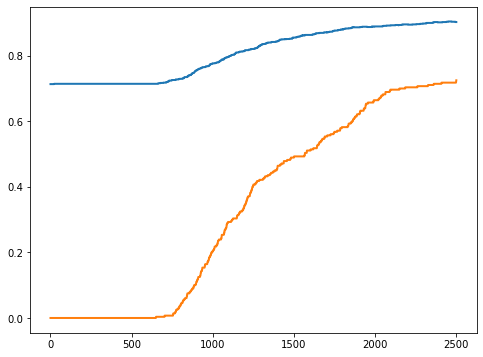

In [31]:
#결과 그래프 생성 
fig = plt.figure(figsize=(8,6))
subplot = fig.add_subplot(1,1,1)
subplot.plot(range(len(train_accuracy)), train_accuracy, linewidth=2, label='Train set')
subplot.plot(range(len(test_accuracy)), test_accuracy, linewidth=2, label='Test set')